In [130]:
# important packages
	
import pandas as pd					# data manipulation using dataframes
import numpy as np					# data statistical analysis

import seaborn as sns				# Statistical data visualization
import matplotlib.pyplot as plt		# data visualisation
%matplotlib inline

## Importing Dataset

In [131]:
df = pd.read_csv("Absenteeism_at_work.csv", sep = ";")
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


## Data Inspection

In [132]:
df.shape

(740, 21)

In [133]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [134]:
df.tail(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
730,6,22,7,3,1,189,29,13,33,264.604,93,0,1,2,0,0,2,69,167,25,16
731,34,23,7,4,1,118,10,10,37,264.604,93,0,1,0,0,0,0,83,172,28,2
732,10,22,7,4,1,361,52,3,28,264.604,93,0,1,1,1,0,4,80,172,27,8
733,28,22,7,4,1,225,26,9,28,264.604,93,0,1,1,0,0,2,69,169,24,8
734,13,13,7,2,1,369,17,12,31,264.604,93,0,1,3,1,0,0,70,169,25,80
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,95,0,1,1,0,0,1,77,175,25,0


In [135]:
# to check category/continuous/numerical columns
# to check null values in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [136]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


## Numerical Analysis

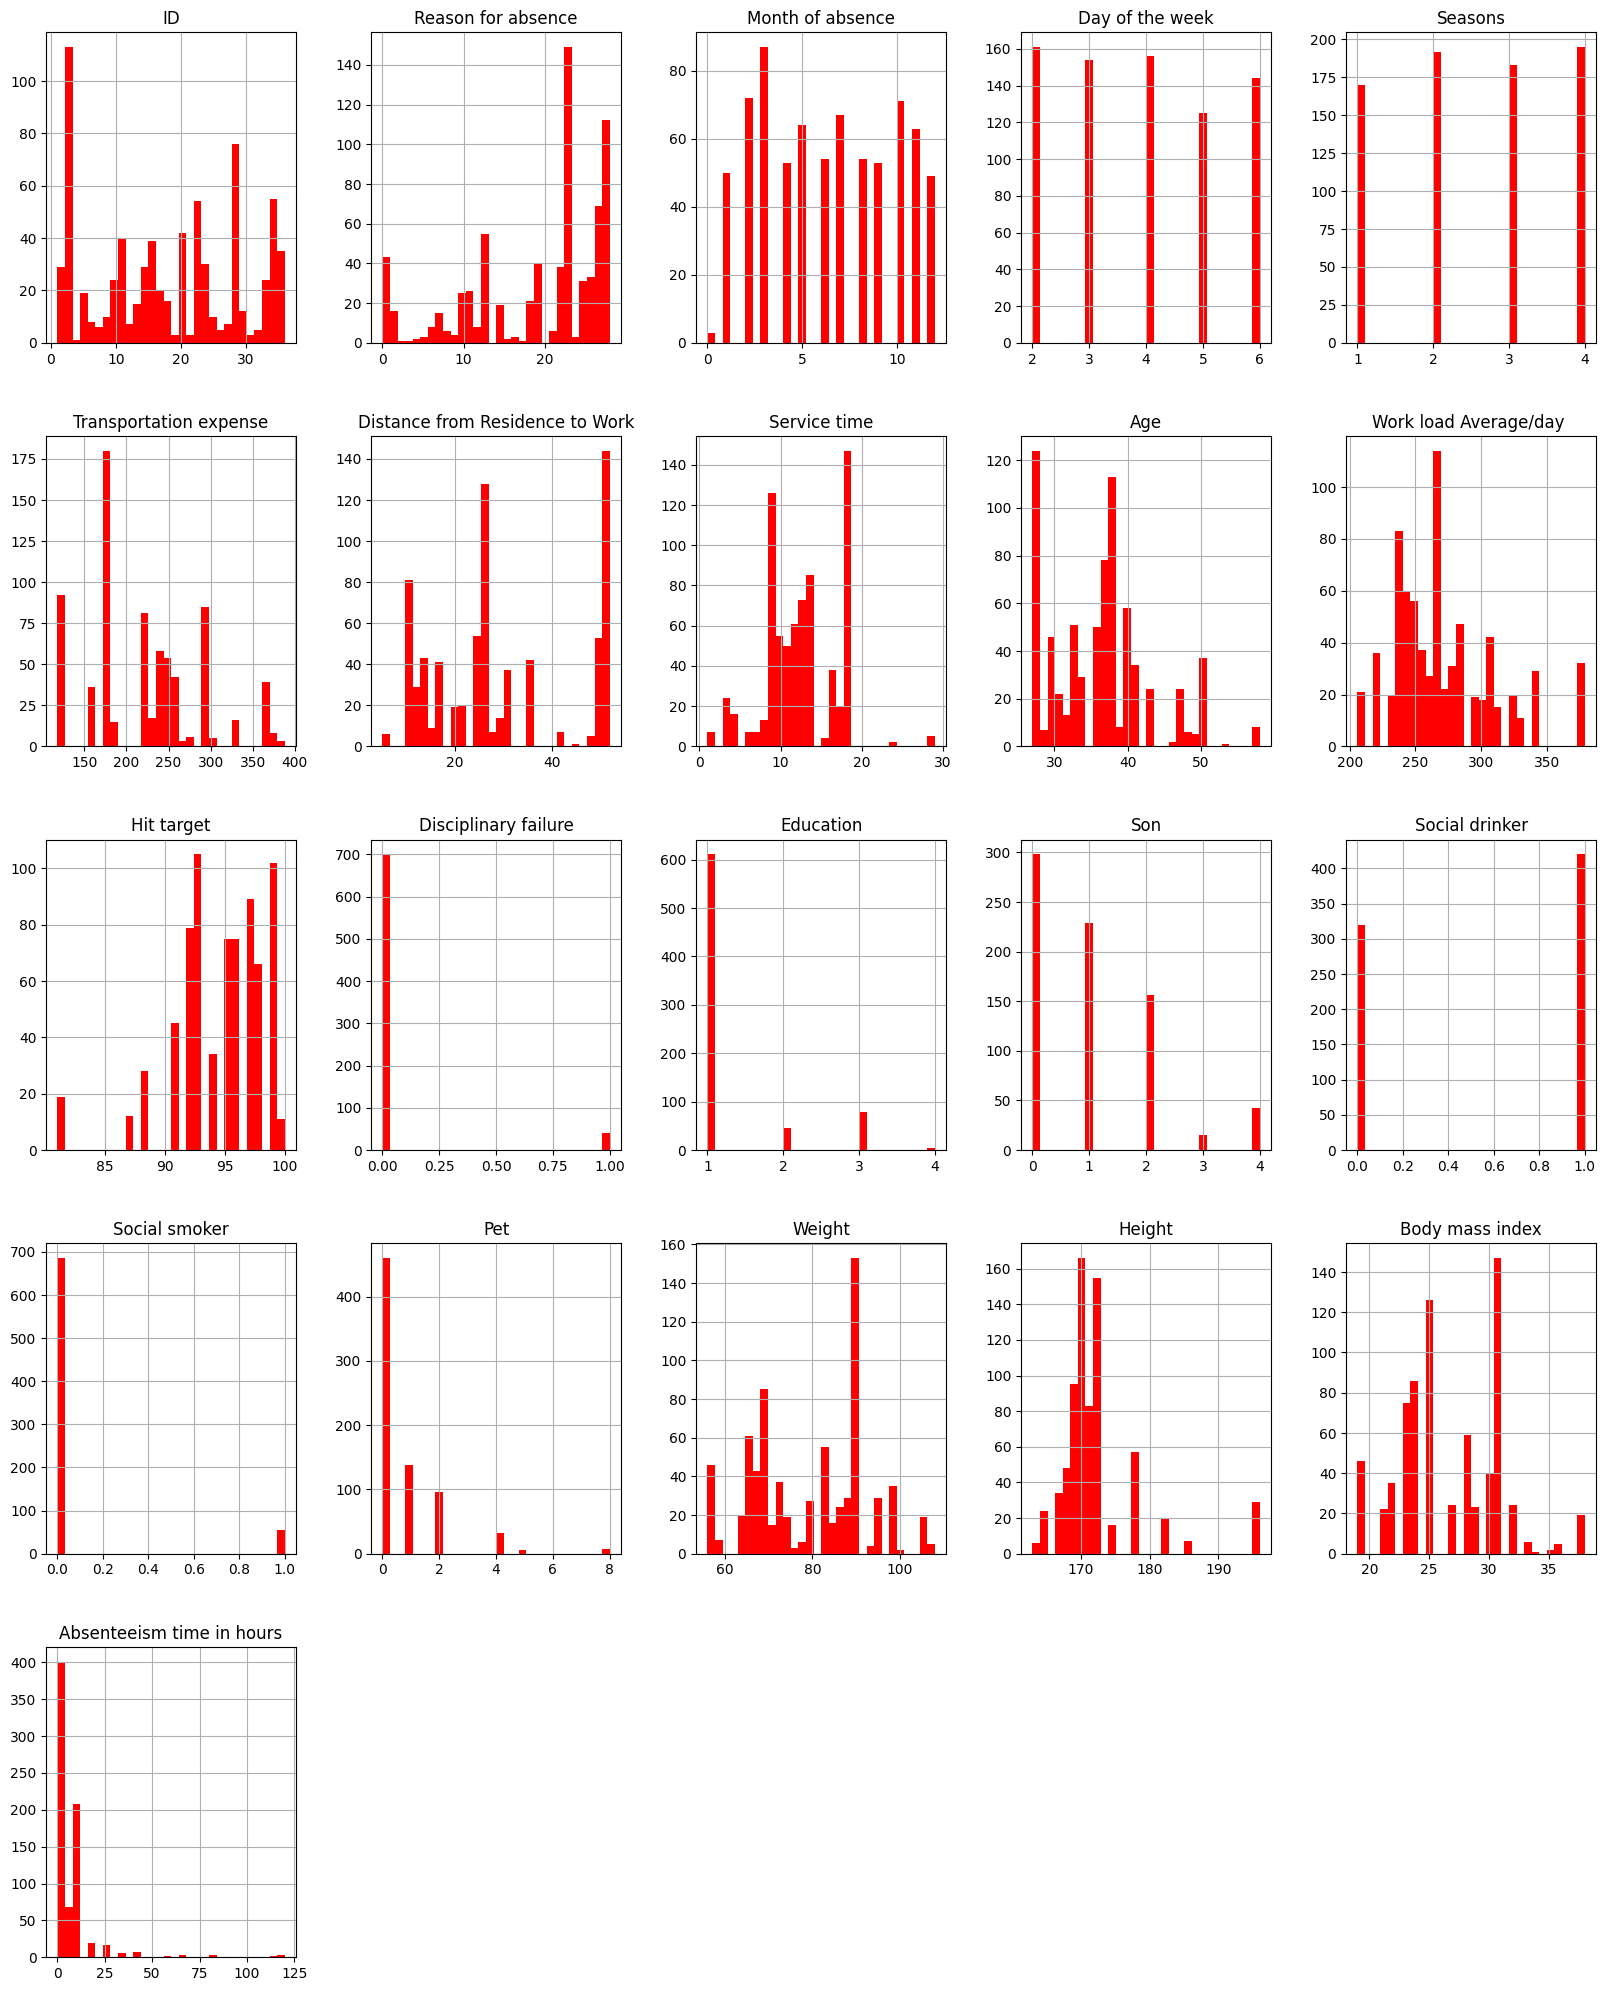

In [137]:

# to check all variables at once

df.hist( bins = 30, figsize = (20,25), color = 'r')
plt.show()

## Correlations

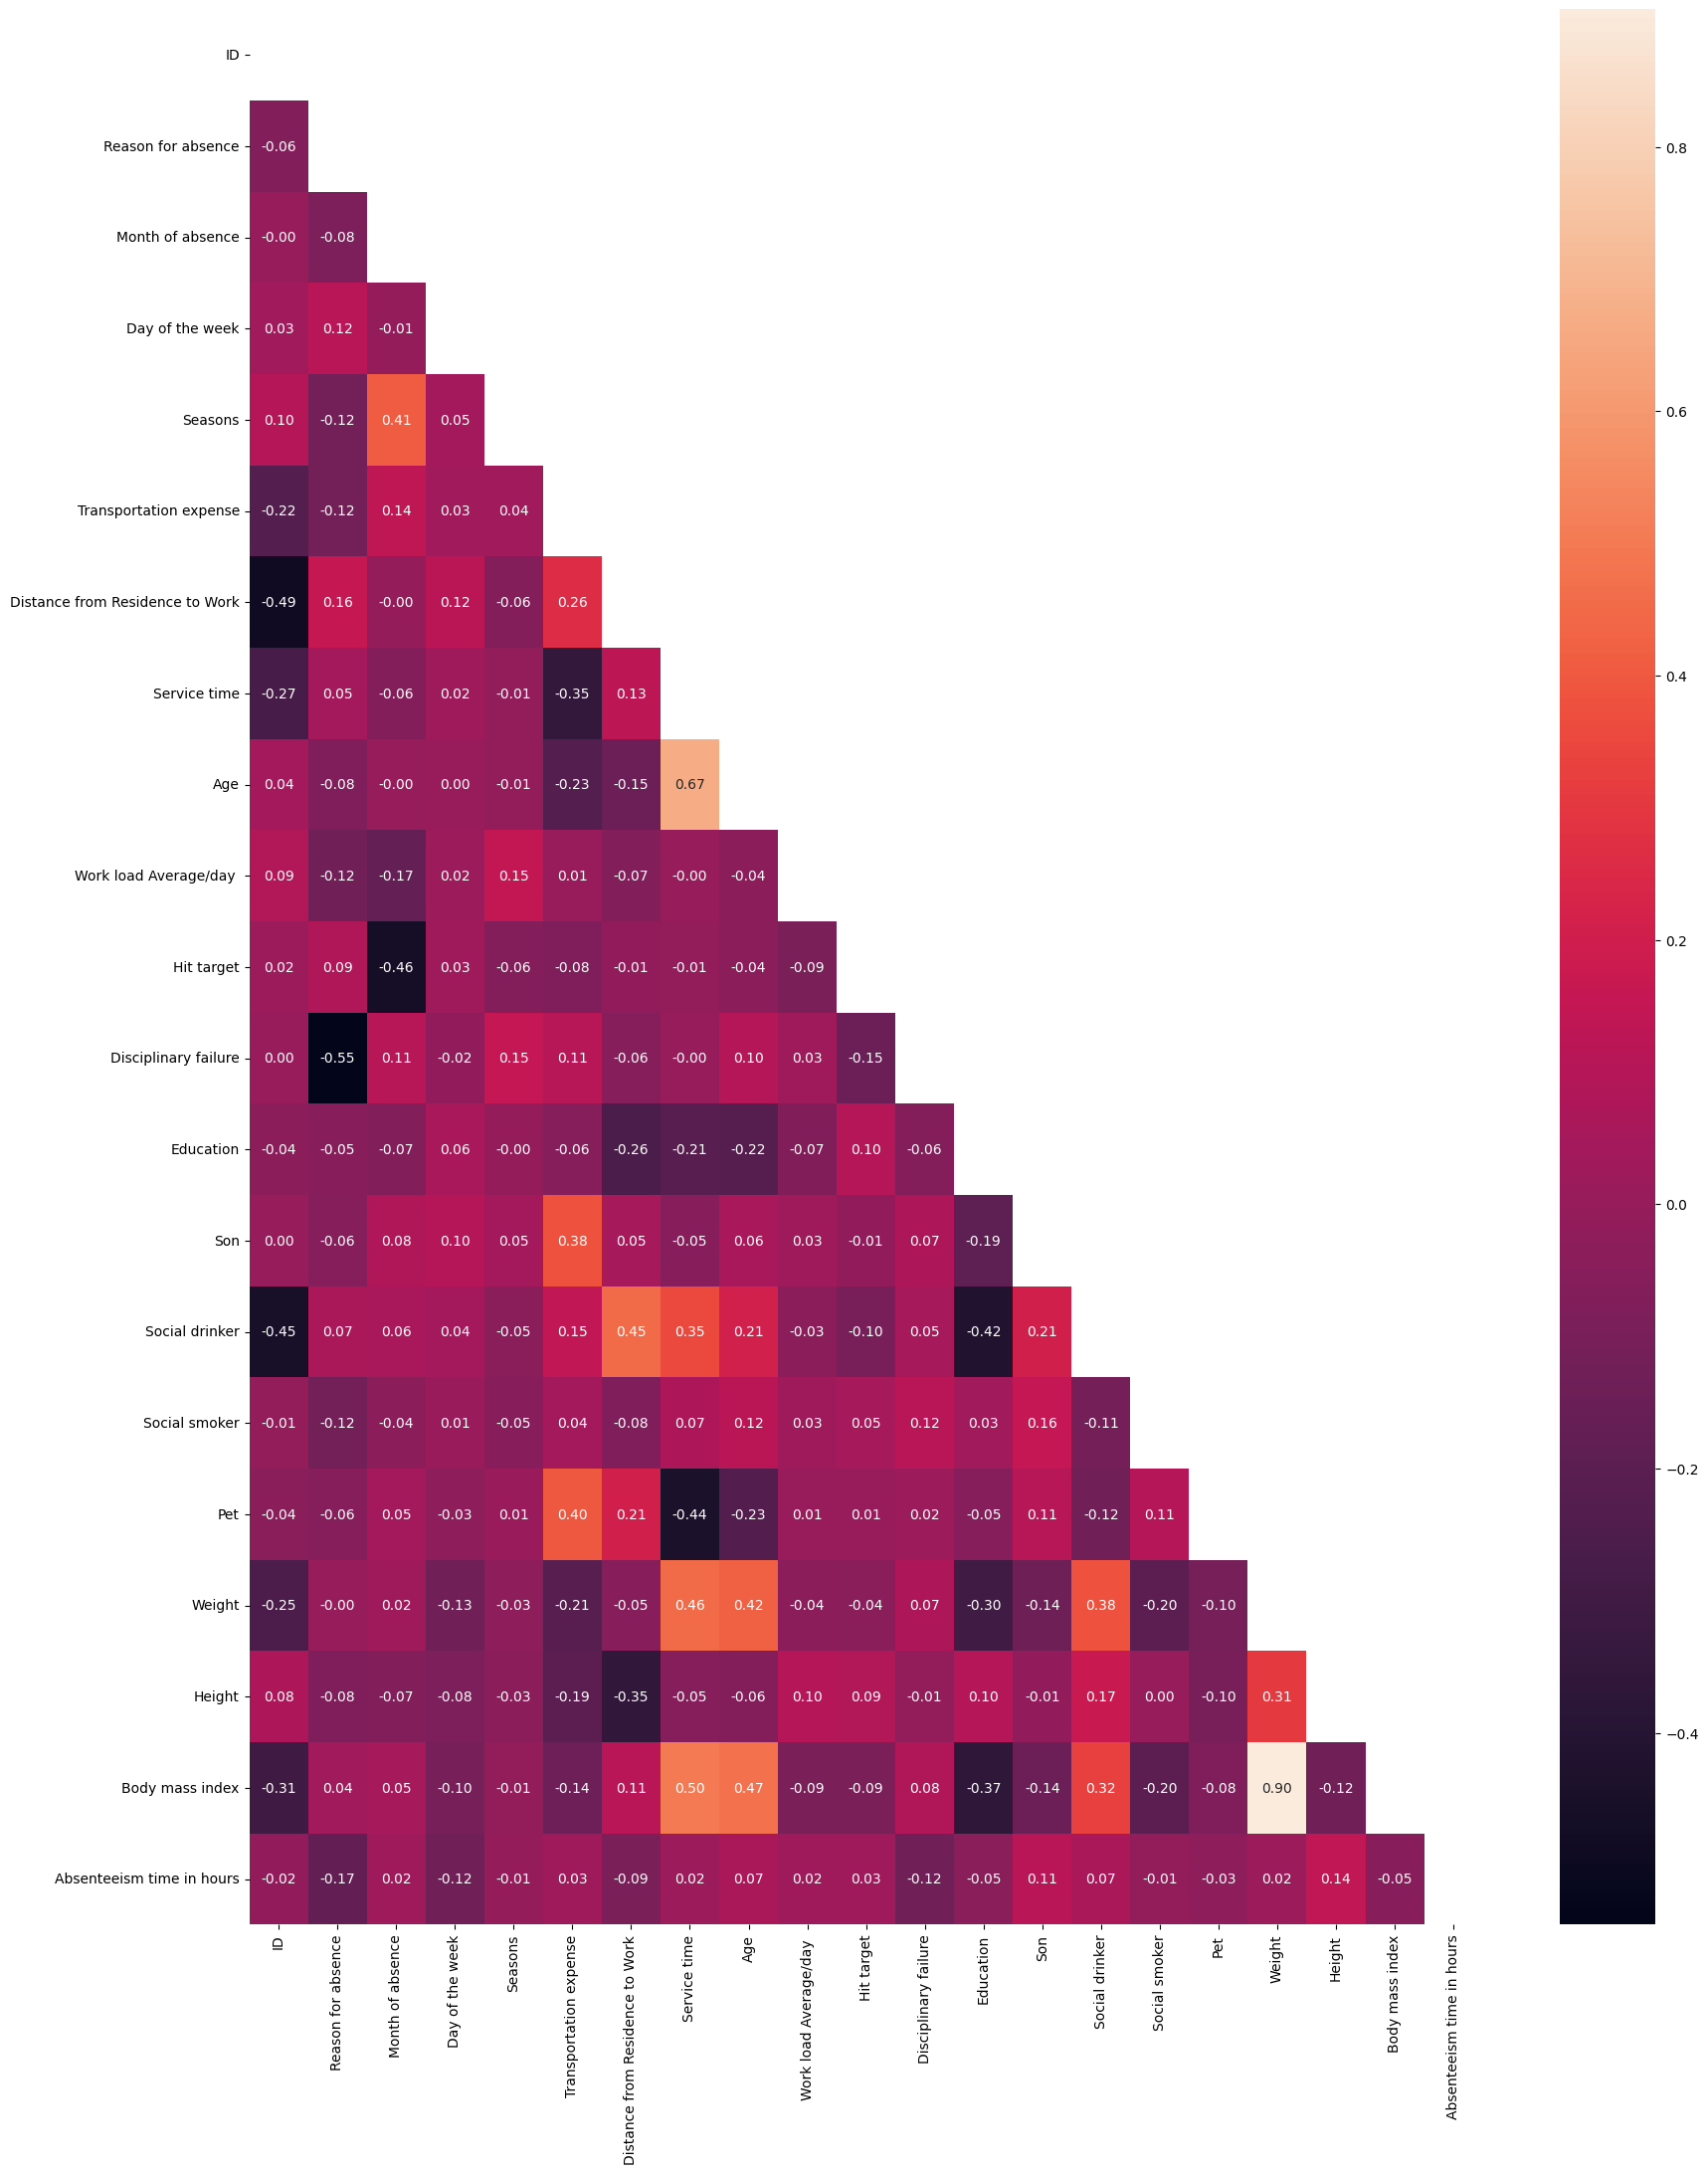

In [138]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool, order = "K")
mask[np.triu_indices_from(mask)]= True

# Heatmap
plt.figure(figsize=(20,25))
sns.heatmap(corr,  annot=True, fmt=".2f", mask = mask)
plt.show()

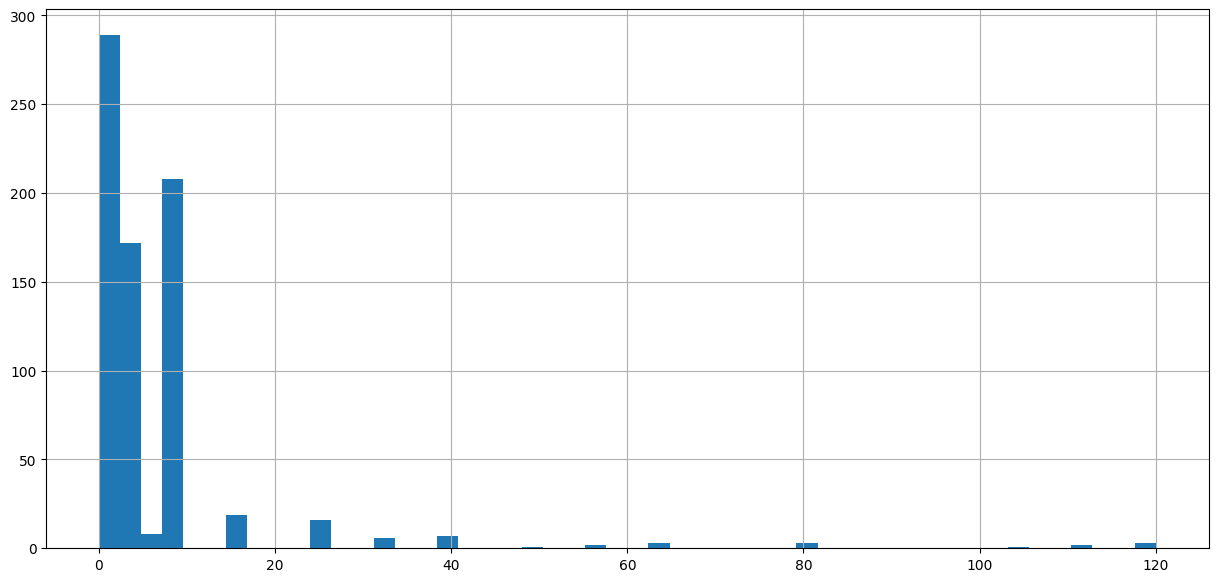

In [139]:
#plt.figure(figsize=(10,7))
#sns.distplot(df1["Absenteeism time in hours"])
df["Absenteeism time in hours"].hist( bins = 50, figsize = (15,7))
plt.show()
     

In [140]:
df["Absenteeism time in hours"].mean()

6.924324324324324

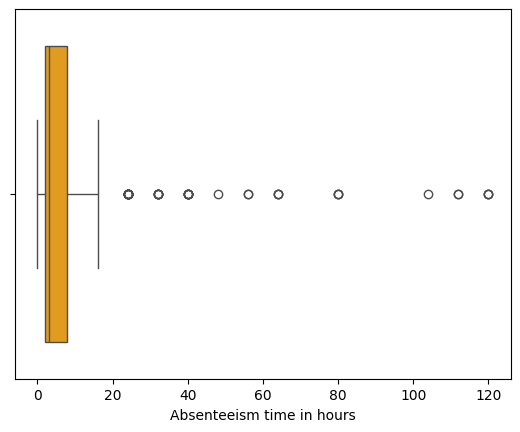

In [141]:
sns.boxplot(df["Absenteeism time in hours"], orient ="h", color = "orange")
plt.show()

## Check Features

In [142]:
absence = df.copy()

0. Checking **ID** column

In [143]:
# Check ID
absence['ID'].unique()  # absence.ID.unique()

array([11, 36,  3,  7, 10, 20, 14,  1, 24,  6, 33, 18, 30,  2, 19, 27, 34,
        5, 15, 29, 28, 13, 22, 17, 31, 23, 32,  9, 26, 21,  8, 25, 12, 16,
        4, 35])

In [144]:
len(absence['ID'].unique())

36

ID column, does not provide enough information, so let's drop it.

In [145]:
absence = absence.drop(['ID'], axis=1)
absence.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


1. Checking **Reason of absence** column

In [146]:
absence1 = absence.copy()

In [147]:
absence1["Reason for absence"].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [148]:
len(absence1['Reason for absence'].unique())

28

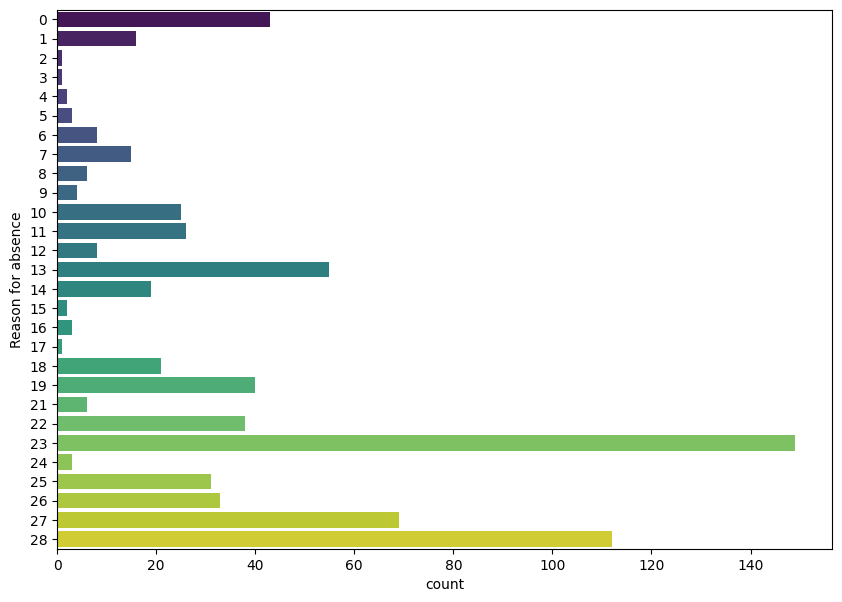

In [149]:
plt.figure(figsize=(10,7))
sns.countplot(y="Reason for absence", data=absence1, palette="viridis")  # along y-axis # sort by count using a vibrant color palette
plt.show()

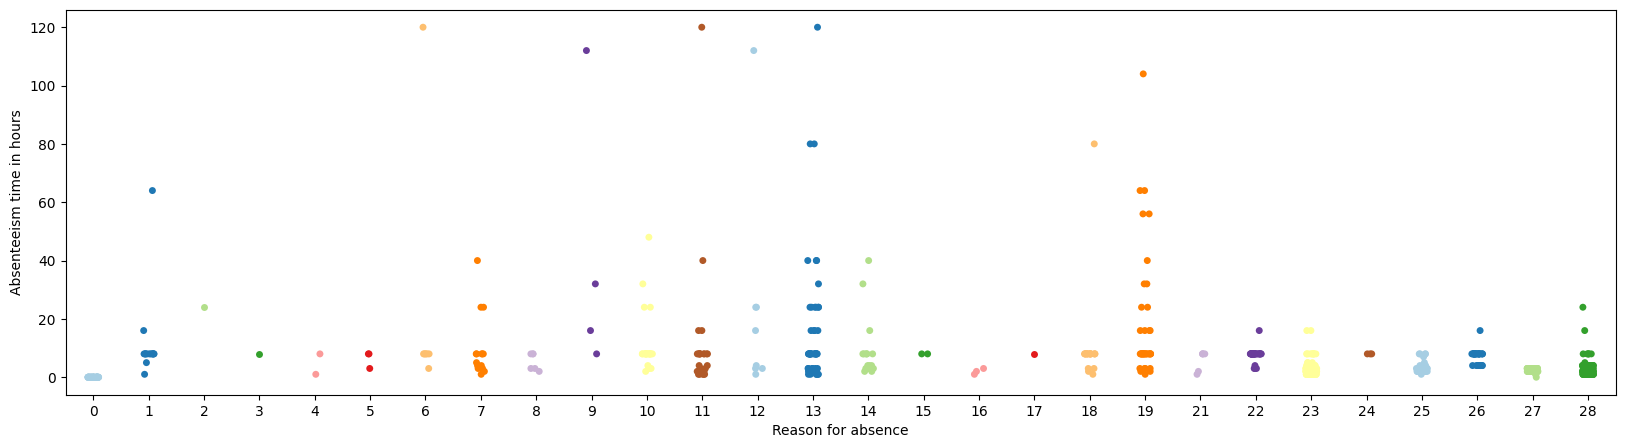

In [150]:
plt.figure(figsize=(20,5))
sns.stripplot(x="Reason for absence", y="Absenteeism time in hours",  data=absence1,  palette="Paired")
plt.show()

## Grouping of ***Reason for absence***

ıt is taken from "***Attribute Information.docx***"
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases
II Neoplasms
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
IV Endocrine, nutritional and metabolic diseases
V Mental and behavioural disorders
VI Diseases of the nervous system
VII Diseases of the eye and adnexa
VIII Diseases of the ear and mastoid process
IX Diseases of the circulatory system
X Diseases of the respiratory system
XI Diseases of the digestive system
XII Diseases of the skin and subcutaneous tissue
XIII Diseases of the musculoskeletal system and connective tissue
XIV Diseases of the genitourinary system
XV Pregnancy, childbirth and the puerperium
XVI Certain conditions originating in the perinatal period
XVII Congenital malformations, deformations and chromosomal abnormalities
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
XIX Injury, poisoning and certain other consequences of external causes
XX External causes of morbidity and mortality
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).


First 14 reasons are related healt diaseases
15, 16 and 17 are related pregnancy and child-birth
18, 19, 20 and 21 are external factors,
22, 23, 24, 25, 26, 27 and 28 light conditions

In [151]:
reasons = pd.get_dummies(absence1['Reason for absence'])

In [152]:
reasons.shape, reasons.head

((740, 28),
 <bound method NDFrame.head of      0   1   2   3   4   5   6   7   8   ...  19  21  22  23  24  25  26  27  28
 0     0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   1   0   0
 1     1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
 2     0   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   0   0
 3     0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   0   0
 4     0   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   0   0
 ..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..
 735   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
 736   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
 737   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
 738   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
 739   1   0   0   0   0   0   0   0   0  ...   0   0   

In [153]:
# o is unknown reason, so I dropped it.
reasons = reasons.drop([0], axis = 1)
reasons.columns

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 21, 22, 23, 24, 25, 26, 27, 28],
           dtype='int64')

HD = Health Diaseases
CB = Child Birth and Pregnancy
EF = External Factors
LC = Light **Conditions**

In [154]:
HD = reasons[[1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]].max(axis = 1)
CB = reasons[[15, 16, 17]].max(axis = 1)
EF = reasons[[18, 19, 21]].max(axis = 1)
LC = reasons[[22, 23, 24, 25, 26, 27, 28]].max(axis = 1)

In [155]:
HD.head()

0    0
1    0
2    0
3    1
4    0
dtype: uint8

In [156]:
absence1 = pd.concat( [absence1, HD.rename('Health Diaseases'), CB.rename('Child Birth and Pregnancy'), EF.rename('External Factors'), LC.rename('Light Conditions')], axis =1 )

In [157]:
absence1.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Health Diaseases',
       'Child Birth and Pregnancy', 'External Factors', 'Light Conditions'],
      dtype='object')

In [158]:
absence1 = absence1[['Health Diaseases',
       'Child Birth and Pregnancy', 'External Factors', 'Light Conditions', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours']]

absence1.head()

,Health Diaseases,Child Birth and Pregnancy,External Factors,Light Conditions,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,0,0,1,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,0,0,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,1,0,0,0,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,0,0,0,1,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


2. Checking **Education** column

In [159]:
absence2 = absence1.copy()

In [160]:
absence2['Education'].unique()

array([1, 3, 2, 4])

<AxesSubplot: xlabel='count', ylabel='Education'>

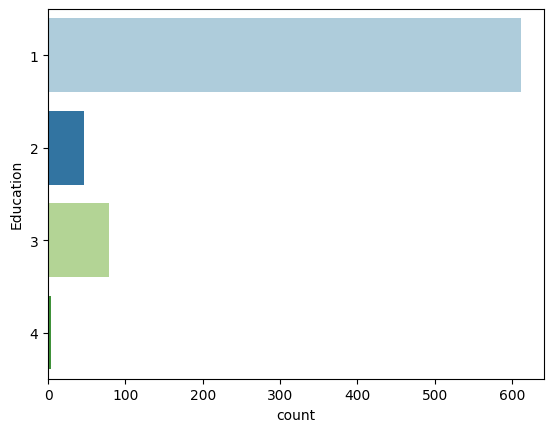

In [161]:
sns.countplot( y = absence2['Education'], palette="Paired")

Number of Employees with high school education is too as compared to others.
Changing into binary will be better.

Education

- high school (1),
- graduate or above

In [162]:
absence2['Education'] = absence2['Education'].map({1:0, 2:1, 3:1, 4:1})

<AxesSubplot: xlabel='count', ylabel='Education'>

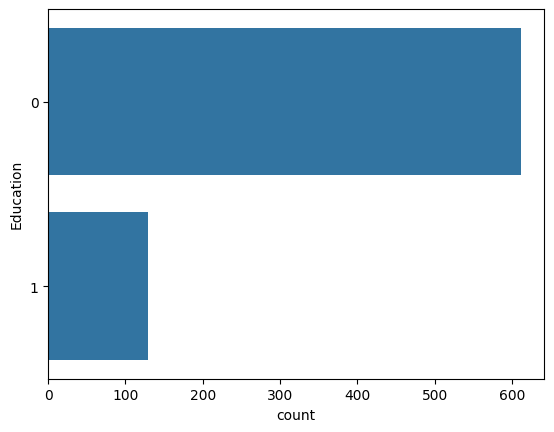

In [163]:
sns.countplot( y = absence2['Education'])

In [164]:
absence2.head()

,Health Diaseases,Child Birth and Pregnancy,External Factors,Light Conditions,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,0,0,1,7,3,1,289,36,13,33,239.554,97,0,0,2,1,0,1,90,172,30,4
1,0,0,0,0,7,3,1,118,13,18,50,239.554,97,1,0,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239.554,97,0,0,0,1,0,0,89,170,31,2
3,1,0,0,0,7,5,1,279,5,14,39,239.554,97,0,0,2,1,1,0,68,168,24,4
4,0,0,0,1,7,5,1,289,36,13,33,239.554,97,0,0,2,1,0,1,90,172,30,2


In [169]:
absence2.to_excel('Absenteeism_pre_processed.xlsx', index=False)